In [1]:
import numpy as np
import h5py
import pickle
import sys
import os
import matplotlib.pyplot as plt

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

import src.models as models 

In [2]:

with h5py.File("scaling_training_regressorV2.h5", "r") as f:
    
    seed_vec_base = f['results/seed'][:]
    ratio_vec_base = f['results/ratio'][:]
    loss_net_vec_base = f['results/loss_net'][:]
    loss_proj_vec_base = f['results/loss_proj'][:]
    pickled_config_base = f['results/config'][()]

config = pickle.loads(pickled_config_base)


unique_hidden_base = np.unique(ratio_vec_base)
loss_net_base_dict = {ele: [] for ele in unique_hidden_base}
loss_proj_base_dict = {ele: [] for ele in unique_hidden_base}

for i in range(len(seed_vec_base)):
    
    loss_net_base_dict[ratio_vec_base[i]].append(loss_net_vec_base[i])
    loss_proj_base_dict[ratio_vec_base[i]].append(loss_proj_vec_base[i])


rmse_net_base_dict = {}
for i, (size, vec) in enumerate(loss_net_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_net_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse_proj_base_dict = {}
for i, (size, vec) in enumerate(loss_proj_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_proj_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    

In [3]:
with h5py.File("scaling_training_pcdae_sine_V3.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    ratio_vec_pcdae = f['results/ratio'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine1_pcdae = f['results/loss_T1'][:]
    loss_refine2_pcdae = f['results/loss_T2'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_hidden_pcdae = np.unique(ratio_vec_pcdae)
loss1_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
loss2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}


for i in range(len(seed_vec_pcdae)):
    loss1_pcdae_dict[ratio_vec_pcdae[i]].append(loss_refine1_pcdae[i])
    loss2_pcdae_dict[ratio_vec_pcdae[i]].append(loss_refine2_pcdae[i])


rmse1_pcdae_dict = {}
for i, (size, vec) in enumerate(loss1_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse1_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse2_pcdae_dict = {}
for i, (size, vec) in enumerate(loss2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse2_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


In [4]:
print(rmse1_pcdae_dict)
print(rmse2_pcdae_dict)

{np.float64(0.15): (np.float64(0.03209503615158658), np.float64(0.015216601221156265)), np.float64(0.3): (np.float64(0.047079033938929434), np.float64(0.04630307363836495)), np.float64(0.45): (np.float64(0.044358588457725556), np.float64(0.0243527615551394)), np.float64(0.6): (np.float64(0.0422356549073981), np.float64(0.01941082107602354)), np.float64(0.75): (np.float64(0.06643075183042874), np.float64(0.016304153887725905))}
{np.float64(0.15): (np.float64(0.03209609342613555), np.float64(0.015218200661220942)), np.float64(0.3): (np.float64(0.047079206001865145), np.float64(0.046303204767361196)), np.float64(0.45): (np.float64(0.04435877999406052), np.float64(0.02435322240202571)), np.float64(0.6): (np.float64(0.042236098645333675), np.float64(0.019410520326501313)), np.float64(0.75): (np.float64(0.06643165880765318), np.float64(0.016303088091917734))}


In [5]:
with h5py.File("scaling_training_ebm_pcdae_sine_V3.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    ratio_vec_pcdae = f['results/ratio'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine_ebm_pcdae = f['results/loss_T'][:]
    loss_refine2_ebm_pcdae = f['results/loss_Tadapt'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_hidden_pcdae = np.unique(ratio_vec_pcdae)
loss_ebm_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
loss_ebm2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}


for i in range(len(seed_vec_pcdae)):
    loss_ebm_pcdae_dict[ratio_vec_pcdae[i]].append(loss_refine_ebm_pcdae[i])
    loss_ebm2_pcdae_dict[ratio_vec_pcdae[i]].append(loss_refine2_ebm_pcdae[i])


rmse_ebm_pcdae_dict = {}
for i, (size, vec) in enumerate(loss_ebm_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_ebm_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    

rmse_ebm2_pcdae_dict = {}
for i, (size, vec) in enumerate(loss_ebm2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_ebm2_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

In [6]:
print(rmse_ebm_pcdae_dict)
print(rmse_ebm2_pcdae_dict)

{np.float64(0.15): (np.float64(0.03147422119445789), np.float64(0.012519922303331082)), np.float64(0.3): (np.float64(0.04436214826295292), np.float64(0.03285150117148657)), np.float64(0.45): (np.float64(0.04484114554278842), np.float64(0.023734171106157307)), np.float64(0.6): (np.float64(0.048841319962140695), np.float64(0.022468010990564273)), np.float64(0.75): (np.float64(0.07035173953733123), np.float64(0.012925989482073748))}
{np.float64(0.15): (np.float64(0.03151372833203713), np.float64(0.012465881726019553)), np.float64(0.3): (np.float64(0.044211733137432416), np.float64(0.032737167410733736)), np.float64(0.45): (np.float64(0.04502986747218342), np.float64(0.023701975632664744)), np.float64(0.6): (np.float64(0.04897314244377977), np.float64(0.02243714659544791)), np.float64(0.75): (np.float64(0.07310447769805978), np.float64(0.014374979264794575))}


In [7]:

# {0.15: (0.030925890463342053, 0.01381257177405546), 0.3: (0.046493308370347396, 0.031187921808543805), 0.45: (0.04542611332613777, 0.025873469803723306), 0.6: (0.04831463651957677, 0.019232090837971873), 0.75: (0.07381536693373594, 0.01512525615489385)}

In [8]:
ratio_train_plot = []

mean_pcdae_plot = []
std_pcdae_plot = []

mean_ebm_pcdae_plot = []
std_ebm_pcdae_plot = []

mean_proj_plot = []
std_proj_plot = []

mean_net_plot = []
std_net_plot = []



for idx, (ele, val) in enumerate(rmse_proj_base_dict.items()):
    
    train_size = 1 - ele
    mean_pcdae, std_pcdae = rmse1_pcdae_dict[ele]
    mean_ebm, std_ebm = rmse_ebm_pcdae_dict[ele]
    mean_base, std_base = rmse_proj_base_dict[ele]
    
    mean_base_net, std_base_net = rmse_net_base_dict[ele]
    
    ratio_train_plot.append(train_size)
    mean_pcdae_plot.append(mean_pcdae)
    std_pcdae_plot.append(std_base)
    mean_ebm_pcdae_plot.append(mean_ebm)
    std_ebm_pcdae_plot.append(std_ebm)
    mean_proj_plot.append(mean_base)
    std_proj_plot.append(std_base)
    
    mean_net_plot.append(mean_base_net)
    std_net_plot.append(std_base_net)
    

ratio_train_plot = np.array(ratio_train_plot)
mean_pcdae_plot = np.array(mean_pcdae_plot)
std_pcdae_plot = np.array(std_pcdae_plot)
mean_ebm_pcdae_plot = np.array(mean_ebm_pcdae_plot)
std_ebm_pcdae_plot = np.array(std_ebm_pcdae_plot)
mean_proj_plot = np.array(mean_proj_plot)
std_proj_plot = np.array(std_proj_plot)

mean_net_plot = np.array(mean_net_plot)
std_net_plot = np.array(std_net_plot)


In [9]:
print(mean_ebm_pcdae_plot)
print(mean_pcdae_plot)

[0.03147422 0.04436215 0.04484115 0.04884132 0.07035174]
[0.03209504 0.04707903 0.04435859 0.04223565 0.06643075]


In [14]:
print(mean_net_plot)
print(mean_proj_plot)

[0.04464706 0.05337277 0.05528235 0.0583887  0.08359152]
[0.04424423 0.05299204 0.05487024 0.05797325 0.08308549]


In [10]:
# print(ratio_train_plot)

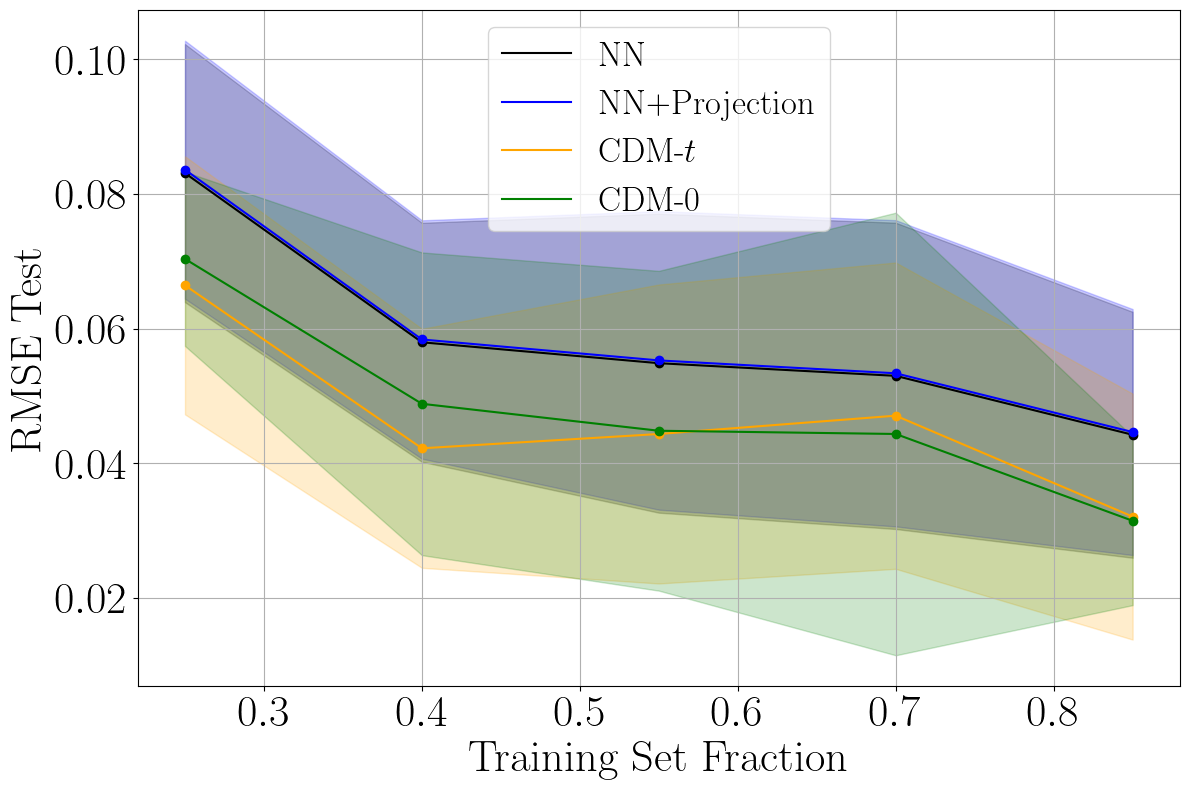

In [17]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'


plt.plot(ratio_train_plot, mean_net_plot, label="NN", color="black")
plt.plot(ratio_train_plot, mean_net_plot, 'o', color="black")
plt.fill_between(ratio_train_plot,
                    mean_net_plot - std_net_plot,
                    mean_net_plot + std_net_plot,
                    alpha=0.2, color="black")


plt.plot(ratio_train_plot, mean_proj_plot, label="NN+Projection", color="blue")
plt.plot(ratio_train_plot, mean_proj_plot, 'o', color="blue")
plt.fill_between(ratio_train_plot,
                    mean_proj_plot - std_proj_plot,
                    mean_proj_plot + std_proj_plot,
                    alpha=0.2, color='blue')


plt.plot(ratio_train_plot, mean_pcdae_plot, label="CDM-$t$", color="orange")
plt.plot(ratio_train_plot, mean_pcdae_plot, 'o', color="orange")
plt.fill_between(ratio_train_plot,
                    mean_pcdae_plot - std_pcdae_plot,
                    mean_pcdae_plot + std_pcdae_plot,
                    alpha=0.2, color="orange")

plt.plot(ratio_train_plot, mean_ebm_pcdae_plot, label="CDM-$0$", color="green")
plt.plot(ratio_train_plot, mean_ebm_pcdae_plot, 'o', color="green")
plt.fill_between(ratio_train_plot,
                    mean_ebm_pcdae_plot - std_ebm_pcdae_plot,
                    mean_ebm_pcdae_plot + std_ebm_pcdae_plot,
                    alpha=0.2, color="green")

plt.xlabel(r'Training Set Fraction', fontsize=32)
plt.ylabel(r'RMSE Test', fontsize=32)
# plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=25)
# plt.ylim(0.005, 0.09)
plt.tight_layout()
plt.grid()
plt.savefig("scaling_training_V3.png")

In [12]:
### less params to see 
### more iteatiosn in the baseline